In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

## Generating Data:

In [20]:
X,Y = make_blobs(n_samples=500,n_features=2,centers=2,random_state=1)
print(X.shape,Y.shape)

(500, 2) (500,)


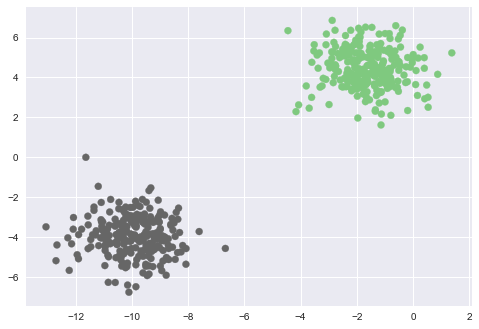

In [21]:
plt.style.use('seaborn')
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

## Model and helper functions:

In [22]:
def sigmoid(z):
    return (1.0)/(1+np.exp(-z))

### Implement Perception Learning Algorithm:
- Learn weights
- Reduce loss
- make predictions

In [23]:
def predict(X,weights):
    # X: MX(N+1) matrix , weights: NX1 vector
    z = np.dot(X,weights)
    predictions = sigmoid(z)
    return predictions

In [24]:
# binary cross entropy / loss:
def loss(X,Y,weights):
    Y_ = predict(X,weights)
    cost = np.mean(-Y*np.log(Y_) - (1-Y)*np.log(1-Y_))
    return cost

def update(X,Y,weights,learning_rate):
    '''Perform weight updates for 1 epoch'''
    Y_ = predict(X,weights)
    # formula for dw/(dx of j) = summation of i from 1 to m of ((Y_ of ith example's jth feature) - 
    # (y of ith example's jth feature)) * (X of ith example's jth feature)
    dw = np.dot(X.T,Y_-Y)
    
    m = X.shape[0]
    weights = weights - learning_rate*dw/(float(m))
    return weights

In [25]:
def train(X,Y,learning_rate=0.5,max_epochs=100):
    # modify the input to handle the bais term:
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones,X))
    # initialise weights with 0
    # remember X.shape[1] is now of the shape (n+1)
    weights = np.zeros(X.shape[1])
    # iterate over all epochs and make updates:
    for epoch in range(max_epochs):
        weights = update(X,Y,weights,learning_rate)
        if epoch%10==0:
            l = loss(X,Y,weights)
            print("%d th epoch, loss is %.4f"%(epoch,l))
                
    return weights

In [26]:
weights = train(X,Y,max_epochs=1000)

0 th epoch, loss is 0.0566
10 th epoch, loss is 0.0110
20 th epoch, loss is 0.0061
30 th epoch, loss is 0.0042
40 th epoch, loss is 0.0033
50 th epoch, loss is 0.0027
60 th epoch, loss is 0.0023
70 th epoch, loss is 0.0020
80 th epoch, loss is 0.0017
90 th epoch, loss is 0.0016
100 th epoch, loss is 0.0014
110 th epoch, loss is 0.0013
120 th epoch, loss is 0.0012
130 th epoch, loss is 0.0012
140 th epoch, loss is 0.0011
150 th epoch, loss is 0.0010
160 th epoch, loss is 0.0010
170 th epoch, loss is 0.0009
180 th epoch, loss is 0.0009
190 th epoch, loss is 0.0009
200 th epoch, loss is 0.0008
210 th epoch, loss is 0.0008
220 th epoch, loss is 0.0008
230 th epoch, loss is 0.0008
240 th epoch, loss is 0.0007
250 th epoch, loss is 0.0007
260 th epoch, loss is 0.0007
270 th epoch, loss is 0.0007
280 th epoch, loss is 0.0007
290 th epoch, loss is 0.0007
300 th epoch, loss is 0.0006
310 th epoch, loss is 0.0006
320 th epoch, loss is 0.0006
330 th epoch, loss is 0.0006
340 th epoch, loss is 0.0

## Visualising decision surface:

In [41]:
def getPredictions(X_test,weights,labels=True):
    if(X_test.shape[1]!=weights.shape[0]):
        ones = np.ones((X_test.shape[0],1))
        X_test = np.hstack((ones,X_test))
        
    probabilities = predict(X_test,weights)
    
    if not labels:
        return probabilities
    else:
        labels = np.zeros(probabilities.shape)
        labels[probabilities>=0.5] = 1
        return labels

In [42]:
x1 = np.linspace(-12,2,10)
# i.e we want 10 equally spaced points in the linear space from -8 to 10
# we know: hypothesis => w0 + w1x1 + w2x2 = 0.So x2 = -(w0+w1x1)/w2
x2 = -(weights[0]+weights[1]*x1)/weights[2]

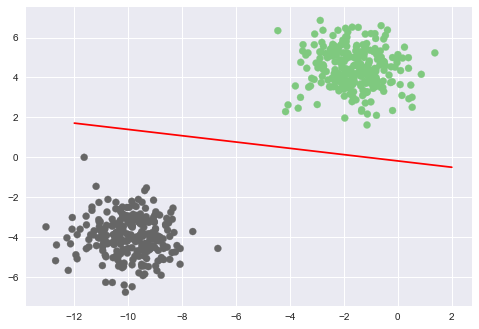

In [43]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.plot(x1,x2,c = 'red')
plt.show()

## Accuracy:

In [44]:
Y_ = getPredictions(X,weights,labels = True)

In [45]:
print(Y_)

[1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0.
 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1.
 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0.
 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0.
 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1.
 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0.
 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1.
 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1.

In [46]:
training_accuracy = np.sum(Y==Y_)/Y.shape[0]
print(training_accuracy*100)

100.0


# Using make_moons instead:

In [47]:
from sklearn.datasets import make_moons

In [50]:
X,Y = make_moons(n_samples=1000,shuffle=True, noise=0.2, random_state=1)
print(X.shape,Y.shape)

(1000, 2) (1000,)


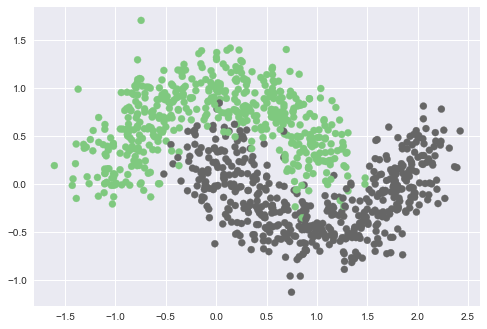

In [51]:
plt.style.use('seaborn')
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

In [52]:
weights = train(X,Y,max_epochs=1000)

0 th epoch, loss is 0.6481
10 th epoch, loss is 0.4575
20 th epoch, loss is 0.4005
30 th epoch, loss is 0.3729
40 th epoch, loss is 0.3562
50 th epoch, loss is 0.3447
60 th epoch, loss is 0.3362
70 th epoch, loss is 0.3296
80 th epoch, loss is 0.3244
90 th epoch, loss is 0.3201
100 th epoch, loss is 0.3166
110 th epoch, loss is 0.3136
120 th epoch, loss is 0.3111
130 th epoch, loss is 0.3090
140 th epoch, loss is 0.3072
150 th epoch, loss is 0.3056
160 th epoch, loss is 0.3042
170 th epoch, loss is 0.3031
180 th epoch, loss is 0.3020
190 th epoch, loss is 0.3011
200 th epoch, loss is 0.3004
210 th epoch, loss is 0.2997
220 th epoch, loss is 0.2991
230 th epoch, loss is 0.2985
240 th epoch, loss is 0.2980
250 th epoch, loss is 0.2976
260 th epoch, loss is 0.2972
270 th epoch, loss is 0.2969
280 th epoch, loss is 0.2966
290 th epoch, loss is 0.2963
300 th epoch, loss is 0.2960
310 th epoch, loss is 0.2958
320 th epoch, loss is 0.2956
330 th epoch, loss is 0.2954
340 th epoch, loss is 0.2

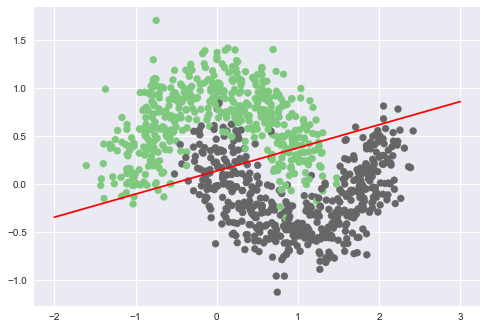

In [53]:
x1 = np.linspace(-2,3,10)
x2 = -(weights[0]+weights[1]*x1)/weights[2]
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.plot(x1,x2,c = 'red')
plt.show()

In [55]:
# this happens because we used a linear classifier wala perceptron on a non linear dataset.
# we can use MLP i.e multi-layer perceptron to learn such a decision boundry or hypothesis.

Y_ = getPredictions(X,weights,labels = True)
training_accuracy = np.sum(Y==Y_)/Y.shape[0]
print(training_accuracy*100)

86.9
